<a href="https://www.kaggle.com/code/shamkumar1307/structural-health-monitoring-using-iot-and-ml?scriptVersionId=252073988" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/iot-ebpl-connected-healthcare-monitoring'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iot-ebpl-connected-healthcare-monitoring/IOT-EBPL-Connected Healthcare Monitoring.csv


># Import Libraries & Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/iot-ebpl-connected-healthcare-monitoring/IOT-EBPL-Connected Healthcare Monitoring.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data = [25,130,80,15.0,98.0,86]

# Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


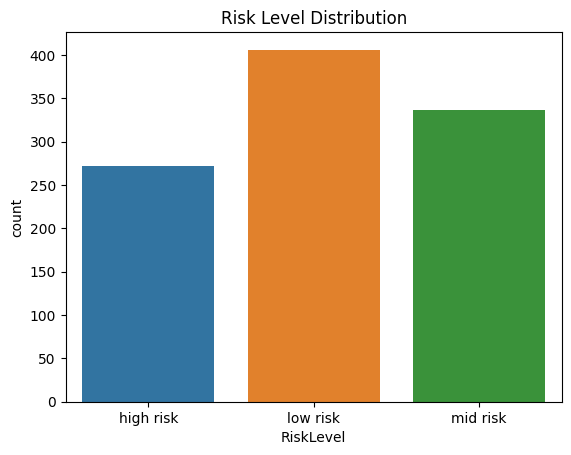

In [8]:
sns.countplot(data=df, x='RiskLevel')
plt.title("Risk Level Distribution")
plt.show()

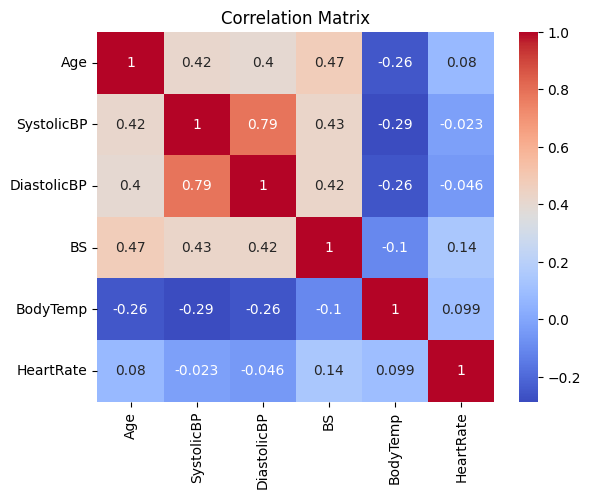

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BodyTemp', ylabel='HeartRate'>

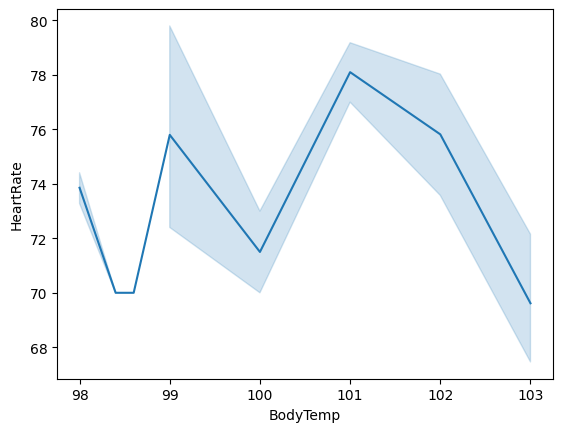

In [10]:
sns.lineplot(data=df, x='BodyTemp', y='HeartRate')

<Axes: >

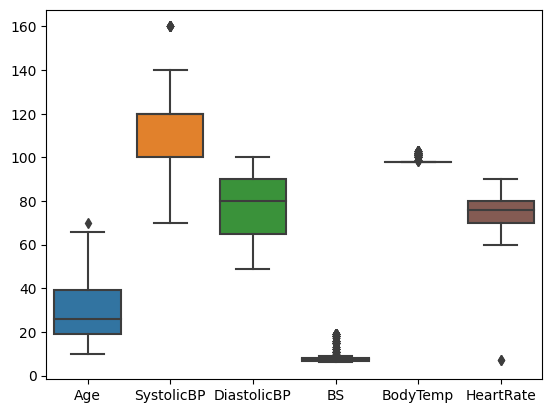

In [11]:
sns.boxplot(data=df.select_dtypes(include=['float64','int64']))

In [12]:
numeric_col = df.select_dtypes(include=['float64','int64'])

for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]

<Axes: >

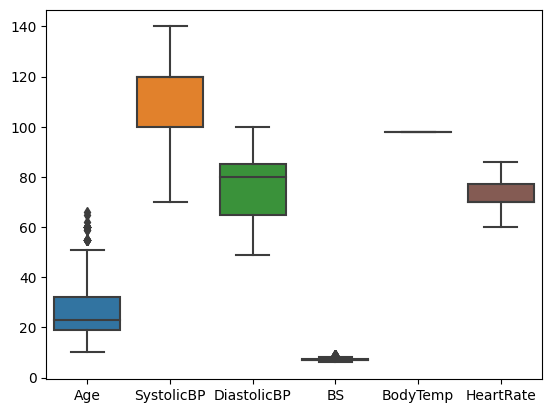

In [13]:
sns.boxplot(data=df.select_dtypes(include=['float64','int64']))

# Data Preprocessing

In [14]:
X = df.drop("RiskLevel", axis=1)
y = df["RiskLevel"]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train Model

Random Forest Classifier

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.825
              precision    recall  f1-score   support

   high risk       0.88      0.70      0.78        10
    low risk       0.86      0.84      0.85        67
    mid risk       0.77      0.84      0.80        43

    accuracy                           0.82       120
   macro avg       0.83      0.79      0.81       120
weighted avg       0.83      0.82      0.83       120



In [18]:
data = [35,	120,	60,	6.1,	98.0,	76]

print(model.predict([data]))


['low risk']


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
joblib.dump(model, "health_monitor_model.pkl")

['health_monitor_model.pkl']